### Importing Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data_train = pd.read_csv(r"C:\Users\Ananta Arora\Documents\Kaggle\House Predictions\train.csv")
data_test= pd.read_csv(r"C:\Users\Ananta Arora\Documents\Kaggle\House Predictions\test.csv")

### Data Exploration

In [3]:
print(data_train.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [4]:
data_train.shape

(1460, 81)

In [5]:
data_test.shape

(1459, 80)

In [6]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data_train.info()
print('_'*40)
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Lets analyse our target variable

In [8]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Lets check for skewness, which is a measure of the shape of the distribution of values.

- When performing regression, sometimes it makes sense to log-transform the target variable when it is skewed. 
- One reason for this is to improve the linearity of the data. Although the justification is beyond the scope of this tutorial, more information can be found here.

- Importantly, the predictions generated by the final model will also be log-transformed, so we’ll need to convert these predictions back to their original form later.

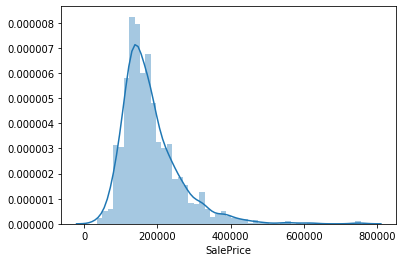

In [9]:
#histogram
sns.distplot(data_train['SalePrice'])

In [10]:
#skewness and kurtosis
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Skew is: 1.8828757597682129


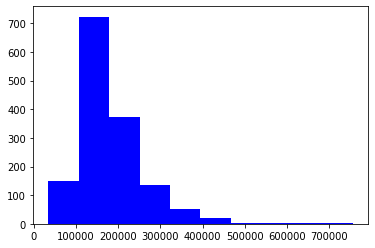

In [11]:
print("Skew is:", data_train.SalePrice.skew())
plt.hist(data_train.SalePrice, color = "blue")
plt.show()

- Now we use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data. A value closer to 0 means that we have improved the skewness of the data.

Skew is: 0.12133506220520406


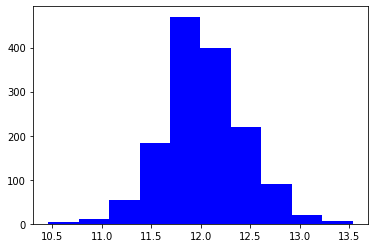

In [12]:
target = np.log(data_train.SalePrice)
print("Skew is:", target.skew())
plt.hist(target, color = "Blue")
plt.show()

In [13]:
data_train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [14]:
numeric_features =  data_train.select_dtypes(include =[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

## Data Visualisation 

I went through this process and concluded that the following variables can play an important role in this problem:

- OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).
- YearBuilt.
- TotalBsmtSF.
- GrLivArea.

#### Dropping the ID column as it unnecessary for the predictions  

In [15]:
data_train.drop("Id", axis = 1, inplace = True)
data_test.drop("Id", axis = 1, inplace = True)


### Relationship with numerical variables¶


### Scatter plot for Salesprice

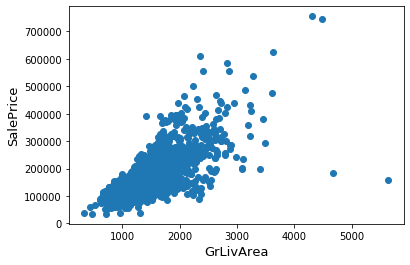

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = data_train['GrLivArea'], y = data_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#### We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

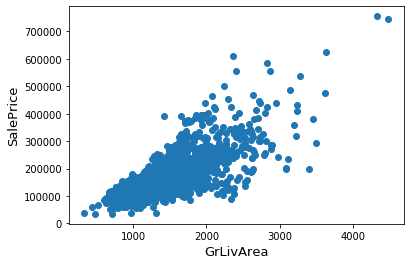

In [17]:
#Deleting outliers
data_train = data_train.drop(data_train[(data_train['GrLivArea']>4000) & (data_train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(data_train['GrLivArea'], data_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


#### Note :
#### Outliers removal is note always safe. We decided to delete these two as they are very huge and really bad ( extremely large areas for very low prices).

There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. That's why , instead of removing them all, we will just manage to make some of our models robust on them.

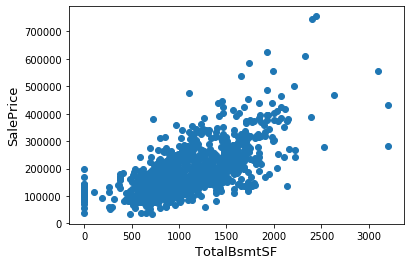

In [18]:
#scatter plot totalbsmtsf/saleprice
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(data_train['TotalBsmtSF'], data_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

### Relationship with categorical features

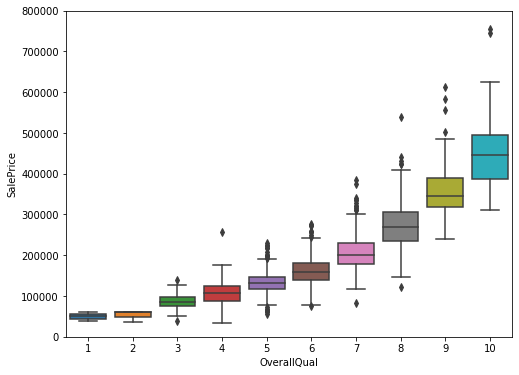

In [19]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

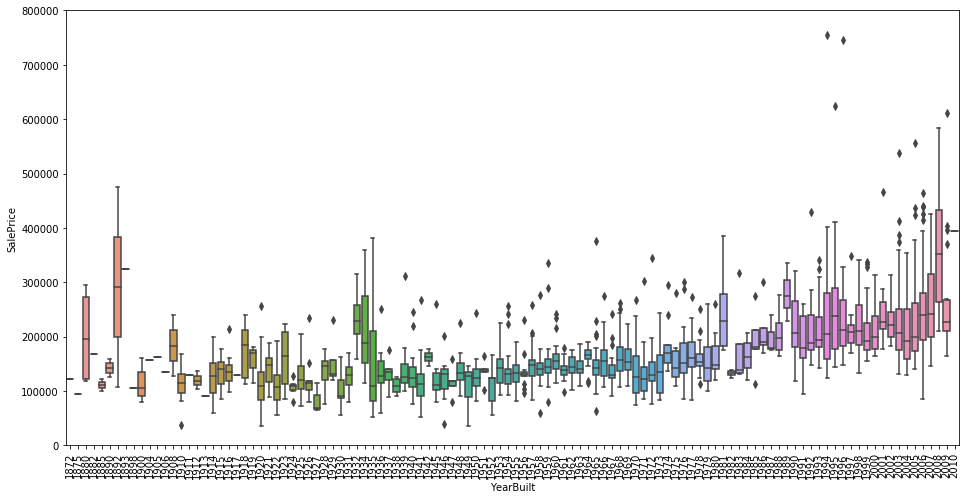

In [20]:
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

 #### we can conclude that:

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

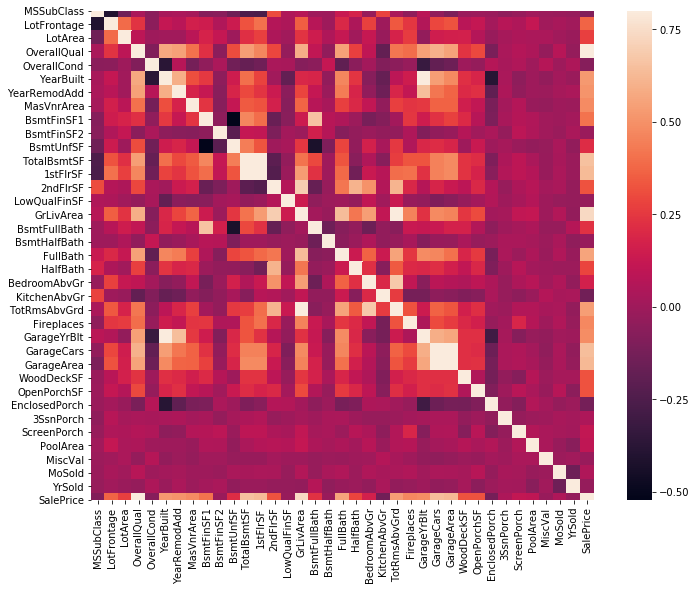

In [21]:
#correlation matrix
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

- At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables.
- Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. 
- If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.
- Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

- Another thing that got my attention was the 'SalePrice' correlations.
- We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' but we can also see many other variables that should be taken into account. That's what we will do next.

#### Lets look the the zoomed salesprice correlation matrix

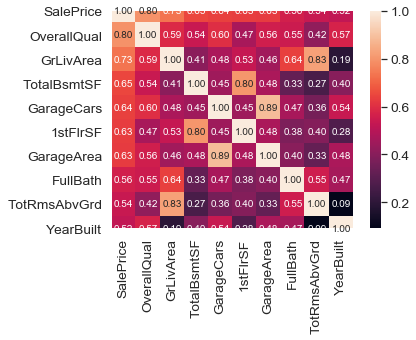

In [22]:
#correlation matrix
corrmat = data_train.corr()
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square =  True, fmt='.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

### Observations:
- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. 
- 'TotalBsmtSF' and '1stFloor' also seem to be highly correlated.
- It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. 
- 'TotRmsAbvGrd' and 'GrLivArea', correlated again.

#### Another way of checking correlated features


In [23]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


#### Missing data

In [24]:
data_train.isnull().any().sum()

19

In [25]:
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


In [26]:
#another way of finding missing values
nulls = pd.DataFrame(data_train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1452
MiscFeature,1404
Alley,1367
Fence,1177
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageCond,81
GarageFinish,81


#### Imputing missing values

#### PoolQC

In [27]:
data_train.PoolQC.describe()

count      6
unique     3
top       Gd
freq       2
Name: PoolQC, dtype: object

- PoolQC : data description says NA means "No Pool". 
- That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general

In [28]:
data_train['PoolQC'] = data_train['PoolQC'].fillna('None')

#### MiscFeature 
- data description says NA means "no misc feature"

In [29]:
data_train.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [30]:
data_train["MiscFeature"] = data_train["MiscFeature"].fillna("None")

#### Alley 
- data description says NA means "no alley access"

In [31]:
data_train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [32]:
data_train["Alley"] = data_train["Alley"].fillna("None")

#### Fence 
- data description says NA means "no fence

In [33]:
data_train.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [34]:
data_train["Fence"] = data_train["Fence"].fillna("None")

#### FireplaceQu 
- data description says NA means "no fireplace"

In [35]:
data_train["FireplaceQu"] = data_train["FireplaceQu"].fillna("None")

#### LotFrontage
- Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [36]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data_train["LotFrontage"] = data_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


#### GarageType, GarageFinish, GarageQual and GarageCond
- Replacing missing data with None

In [37]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data_train[col] = data_train[col].fillna('None')

#### GarageYrBlt, GarageArea and GarageCars
- Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [38]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data_train[col] = data_train[col].fillna(0)

#### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath 
- missing values are likely zero for having no basement

In [39]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data_train[col] = data_train[col].fillna(0)

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 
- For all these categorical basement-related features, NaN means that there is no basement.

In [40]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data_train[col] = data_train[col].fillna('None')


#### MasVnrArea and MasVnrType 
- NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [41]:
data_train["MasVnrType"] = data_train["MasVnrType"].fillna("None")
data_train["MasVnrArea"] = data_train["MasVnrArea"].fillna(0)

#### MSZoning (The general zoning classification) 
- 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [42]:
data_train.MSZoning.value_counts()

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [43]:
data_train['MSZoning'] = data_train['MSZoning'].fillna(data_train['MSZoning'].mode()[0])

#### Electrical
- It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [44]:
data_train['Electrical'] = data_train['Electrical'].fillna(data_train['Electrical'].mode()[0])

#### Checking the missing values again

In [45]:
data_train.isnull().any().any()

False

In [46]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


### Transforming some numerical variables that are really categorical


In [47]:
#Transforming required numerical features to categorical 
data_train['MSSubClass']= data_train['MSSubClass'].apply(str)
data_train['OverallCond'] =data_train['OverallCond'].astype(str)
data_train['YrSold'] = data_train['YrSold'].astype(str)
data_train['MoSold'] = data_train['MoSold'].astype(str)


In [48]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [49]:
#data_train = data_train.drop(['Utilities'], axis=1)

### Label Encoding some categorical variables
-  The number of categories is quite large as one-hot encoding can lead to high memory consumption so we will apply Label encoder

In [50]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data_train[c].values)) 
    data_train[c] = lbl.transform(list(data_train[c].values))

# shape        
print('Shape all_data: {}'.format(data_train.shape))

Shape all_data: (1458, 80)


In [51]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,9,RL,65.0,8450,1,1,3,Lvl,AllPub,Inside,...,0,3,4,None,0,4,2,WD,Normal,208500
1,4,RL,80.0,9600,1,1,3,Lvl,AllPub,FR2,...,0,3,4,None,0,7,1,WD,Normal,181500
2,9,RL,68.0,11250,1,1,0,Lvl,AllPub,Inside,...,0,3,4,None,0,11,2,WD,Normal,223500
3,10,RL,60.0,9550,1,1,0,Lvl,AllPub,Corner,...,0,3,4,None,0,4,0,WD,Abnorml,140000
4,9,RL,84.0,14260,1,1,0,Lvl,AllPub,FR2,...,0,3,4,None,0,3,2,WD,Normal,250000


#### Adding one more important feature

In [52]:
data_train['TotalSF'] = data_train['TotalBsmtSF'] + data_train['1stFlrSF'] + data_train['2ndFlrSF']

#### Checking the skew of all numericla features

In [53]:
from scipy import stats
from scipy.stats import norm, skew
numeric_feats = data_train.dtypes[data_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
LandSlope,4.805032
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895


#### We log transformed the target variable previously.Now we will transform our data using Boxcox1p which computes the box cox transformation of 1+x

In [54]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
   
    data_train[feat] = boxcox1p(data_train[feat], lam)
    


There are 60 skewed numerical features to Box Cox transform


### Getting Dummy Categorical variables


In [55]:
data_train = pd.get_dummies(data_train)
print(data_train.shape)

(1458, 223)


In [56]:
data_train.SalePrice.describe()

count    1458.000000
mean       33.882824
std         2.444218
min        25.346926
25%        32.324223
50%        33.673462
75%        35.354791
max        44.102598
Name: SalePrice, dtype: float64

### Modelling

In [57]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [58]:
X  = data_train.drop("SalePrice", axis=1)
Y  = data_train["SalePrice"]


In [59]:
X.shape

(1458, 222)

In [60]:
from sklearn.model_selection import train_test_split
# setting up testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=27)

In [61]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(X_train, y_train)
# get cross val scores


In [62]:
# given our model and our fit, predict y_values using X_test set
yr_hat = lr.predict(X_test)
yr_hat

array([35.41265198, 36.48964571, 31.90000804, 32.07183847, 36.35907029,
       32.74236668, 34.98462742, 35.67322435, 35.24212976, 34.64382782,
       32.60180753, 34.60873865, 35.71773564, 33.06108248, 30.20994255,
       31.22900573, 32.09421105, 32.17671827, 32.95290434, 32.92003829,
       32.45437937, 34.93945493, 31.52670549, 35.15647581, 32.87885129,
       32.53410862, 29.57478608, 33.0532325 , 35.43792551, 32.84483073,
       33.17010909, 30.98048383, 33.34932773, 30.87164549, 36.61593245,
       34.26176965, 34.33800259, 34.4247332 , 31.61220997, 34.78230172,
       37.63812331, 33.95979717, 35.4343551 , 34.27115128, 34.38464146,
       32.26148351, 37.99631641, 33.06005307, 33.29604511, 38.76382067,
       32.77051182, 35.75396469, 31.57204717, 34.69243917, 38.36819128,
       31.53903656, 36.69686015, 32.88326437, 35.62732444, 29.45059178,
       34.2793241 , 32.53148414, 34.78575877, 31.24571629, 33.29283263,
       38.21339478, 31.27974011, 33.44003089, 36.11666493, 30.93

#### Since the values are not continous it will throw error while predicting score
- In this case, we need to change our metrics from accuracy to rmse or mse

In [63]:

# evaluate the algorithm with a test set 
lr_score = lr.score(X_test, y_test)  # train test 
print("Accuracy: ", lr_score)


Accuracy:  0.8990331960661381


In [64]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': yr_hat})
df1 = df.head(25)
df1

,Actual,Predicted
2,35.629466,35.412652
105,36.346360,36.489646
680,32.889081,31.900008
71,32.305066,32.071838
1230,34.611664,36.359070
1377,31.716180,32.742367
333,35.145686,34.984627
793,35.671925,35.673224
143,35.054225,35.242130
977,34.927362,34.643828


**We will do cross-validation to see whether the model is over-fitting the data:**

In [65]:
# cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
lr_cv = cross_val_score(lr, X_train, y_train, cv = 5, scoring= 'r2')
print("Cross-validation results: ", lr_cv)
print("R2: ", lr_cv.mean())

Cross-validation results:  [0.87478121 0.90479142 0.92374906 0.91425794 0.9086268 ]
R2:  0.9052412885614688


#### lets write a function for cross validation

In [66]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
# Instead of using X_train and y_train we can use X and y also
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

### Linear Regression using Cross-validation

In [67]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(X_train, y_train)
# get cross val scores
get_cv_scores(lr)

CV Mean:  0.9052412885614688
STD:  0.016512529404824578




### Ridge Regularization

In [68]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.9156556619985412
STD:  0.012929717316877254




#### Hyperparameter Tuning

In [69]:
# find optimal alpha with grid search

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Score:  0.9167136308141411
Best Params:  {'alpha': 10}


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    3.1s finished


#### Applying best parameters

In [70]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=10).fit(X_train, y_train)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.9177647086995494
STD:  0.012210097216908078




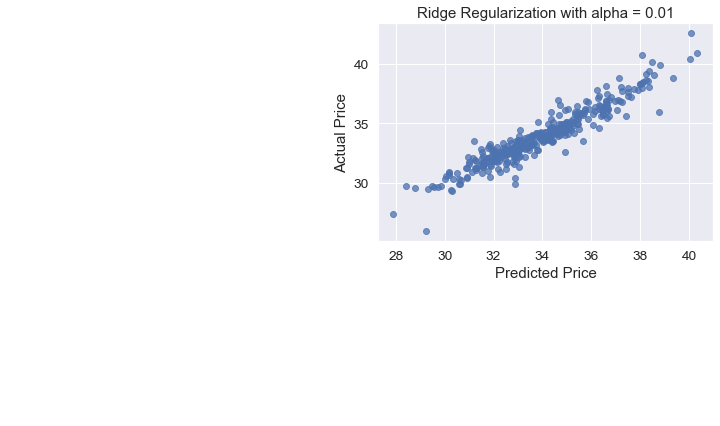

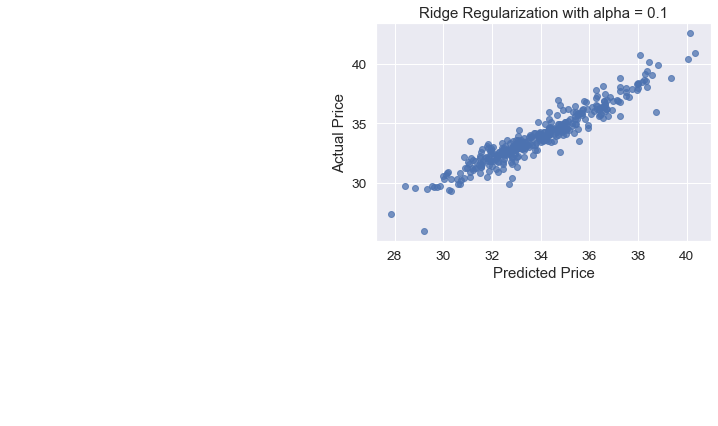

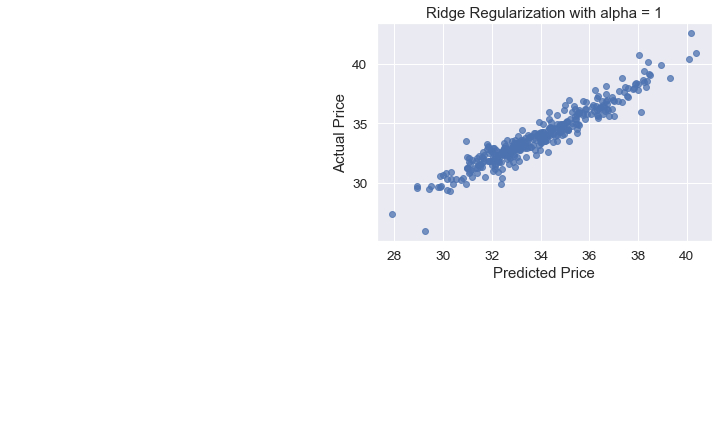

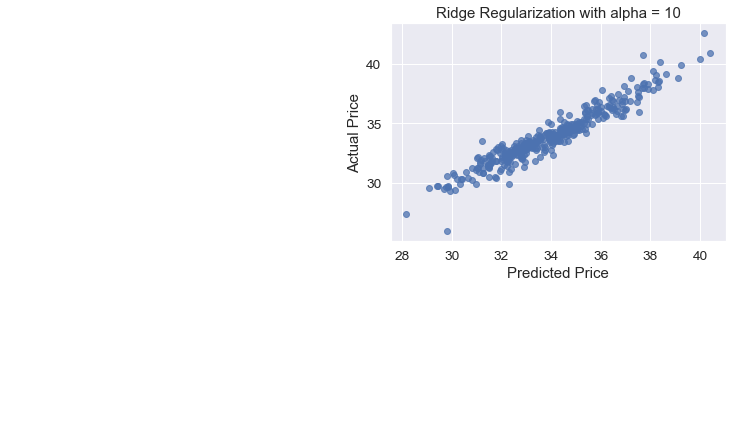

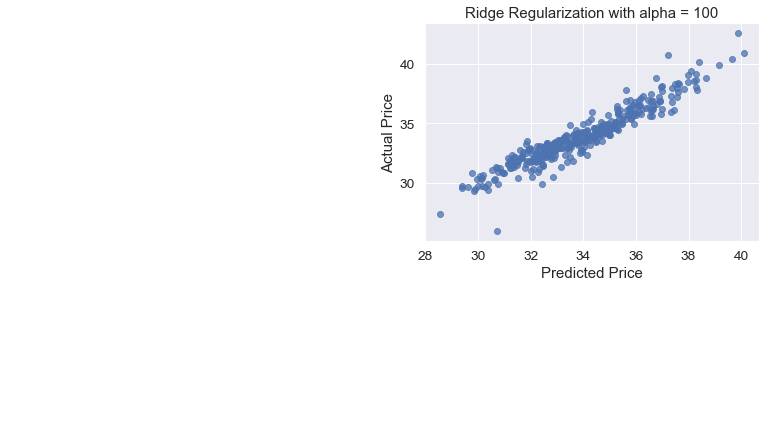

In [71]:
for i in range (-2, 3):
    alpha = 10**i
   
    ridge_model = Ridge(alpha = alpha).fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, y_test, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

- Our score has improved

### Lasso Regression

In [72]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(lasso)

CV Mean:  0.581700321993294
STD:  0.03670724989397819




#### Hyperparameter Tuning

In [73]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Score:  0.9184532679060587
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished


#### Applying best parameters

In [127]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict

# Train model with default alpha=1
lasso = Lasso(alpha=0.001).fit(X_train, y_train)
k_predictions = cross_val_predict(lasso, X_test, y_test, cv=10)
# get cross val scores
get_cv_scores(lasso)
# print(k_predictions)

CV Mean:  0.9201871544307701
STD:  0.011859759473104322




In [130]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': k_predictions})
df1 = df.head(25)
df1

,Actual,Predicted
2,35.629466,35.492760
105,36.346360,36.614838
680,32.889081,31.710816
71,32.305066,30.899924
1230,34.611664,35.686817
1377,31.716180,32.806309
333,35.145686,36.061508
793,35.671925,36.241313
143,35.054225,35.443933
977,34.927362,34.934976


- Our result has improved

### Elastic-Net Regression

In [75]:
from sklearn.linear_model import ElasticNet
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)
# get cross val scores
get_cv_scores(elastic_net)

CV Mean:  0.6741217588993672
STD:  0.028039126383972105




#### Hyperparameter Tuning

In [76]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 77 candidates, totalling 231 fits


c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    5.2s finished


Best Score:  0.9184532679060587
Best Params:  {'alpha': 0.001, 'l1_ratio': 1}


#### Evaluating results

In [77]:
from sklearn.linear_model import ElasticNet
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5).fit(X_train, y_train)
# get cross val scores
get_cv_scores(elastic_net)

CV Mean:  0.9173693851854905
STD:  0.012173072707637414




### Random Forest

- Random forest is an advanced decision tree based machine learning. It has a classification and a regression random forest algorithm. 
- Its performance is slightly better than regression. 
- Like regularization, we can optimize the model parameters for best performance using gridsearch.

In [78]:
#rfr = RandomForestRegressor(n_estimators = 100, max_depth = 5, min_samples_leaf= 5, max_features = 'sqrt')  # using GridSearch
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train) # gets the parameters for the rfr model
get_cv_scores(rfr)

c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CV Mean:  0.8702510737541862
STD:  0.014102763437627229




#### Feature Importance

In [79]:
# Random forest determined feature importances
rfr.feature_importances_

array([1.42551442e-03, 3.34722212e-03, 8.43492378e-03, 5.49064266e-05,
       4.11916212e-05, 1.21066500e-03, 3.47158029e-04, 5.15715518e-01,
       6.44881512e-03, 1.10987864e-02, 1.07139188e-02, 2.16135674e-03,
       1.41285299e-03, 7.43771675e-04, 5.07304126e-03, 3.95105240e-04,
       7.22607132e-04, 1.61440492e-03, 1.59213092e-02, 6.28027778e-04,
       4.23923384e-04, 6.58460745e-03, 3.12710422e-03, 8.83207552e-04,
       1.09464996e-02, 8.12538269e-03, 4.72956315e-03, 4.55928914e-05,
       1.46615110e-02, 3.69198675e-04, 2.36036175e-04, 2.45597589e-03,
       3.23733345e-04, 1.22393997e-03, 4.18671544e-05, 2.99854720e-03,
       1.83880995e-03, 8.41523659e-04, 2.83877546e-03, 1.88424257e-03,
       4.56491725e-03, 1.11472404e-03, 7.76277910e-03, 1.11659333e-02,
       5.31468843e-05, 1.10767741e-03, 6.49723587e-05, 1.90609076e-03,
       2.85769645e-03, 1.11398787e-03, 1.41721539e-04, 1.82354461e-04,
       4.95549852e-07, 2.25598136e-07, 1.45548880e-03, 2.39124284e-04,
      

In [80]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
OverallQual,0.516
TotalSF,0.282
BsmtFinSF1,0.016
GrLivArea,0.015
GarageArea,0.011
CentralAir,0.011
YearBuilt,0.011
YearRemodAdd,0.011
LotArea,0.008


In [81]:
importance = rfr.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['OverallQual', 'TotalSF', 'BsmtFinSF1', 'GrLivArea', 'GarageArea', 'YearBuilt', 'CentralAir', 'YearRemodAdd', 'LotArea', '1stFlrSF', 'GarageCars', 'BsmtUnfSF', 'OverallCond', 'BsmtQual', 'MSZoning_RM']


([<matplotlib.axis.XTick at 0x19b54da97f0>,
 <a list of 15 Text xticklabel objects>)

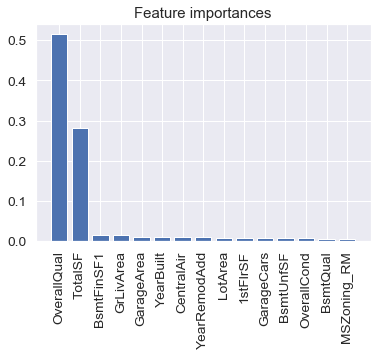

In [82]:

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="b", align="center")
plt.xticks(range(len(predictors)), predictors, rotation=90)

### Gradient Boosting Classifier
- Gradient boosting is an alogithm under supervised machine learning, boosting means converting weak into strong. 
- In this new tree is boosted over the previous tree


In [123]:
from sklearn.ensemble import GradientBoostingRegressor
gbk = GradientBoostingRegressor()
gbk.fit(X_train, y_train)
pred = gbk.predict(X_test)
r2 = r2_score(y_test,pred)
print(r2)

0.9102078981174502


### XGBoost
- XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
- In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks.
- It is a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time.

In [120]:
from sklearn.metrics import r2_score
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X_train, y_train)
r2_score(model_xgb.predict(X_test), y_test)

0.9138242114022942

### Light GBM
- LightGBM is a gradient boosting framework that uses tree based learning algorithms. 
- It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel and GPU learning.
- Capable of handling large-scale data.

In [121]:
import lightgbm as lgbm
import lightgbm as lgb
kfold = KFold(n_splits=5, random_state = 2020, shuffle = True)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train, y_train)
r2_score(model_lgb.predict(X_test), y_test)

0.908888571998055

### Catboost
- Catboost is a type of gradient boosting algorithms which can automatically deal with categorical variables without showing the type conversion error, which helps you to focus on tuning your model better rather than sorting out trivial errors.
- Make sure you handle missing data well before you proceed with the implementation.

In [122]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)
cb_model.fit(X_train, y_train)
r2_score(cb_model.predict(X_test), y_test)

0:	learn: 2.4020960	total: 42.5ms	remaining: 21.2s
50:	learn: 0.8130910	total: 2.2s	remaining: 19.3s
100:	learn: 0.5515459	total: 4.44s	remaining: 17.5s
150:	learn: 0.4403878	total: 6.63s	remaining: 15.3s
200:	learn: 0.3621386	total: 8.84s	remaining: 13.1s
250:	learn: 0.3087620	total: 11.1s	remaining: 11s
300:	learn: 0.2595850	total: 13.3s	remaining: 8.76s
350:	learn: 0.2271697	total: 15.4s	remaining: 6.55s
400:	learn: 0.1938374	total: 17.6s	remaining: 4.34s
450:	learn: 0.1613293	total: 19.7s	remaining: 2.15s
499:	learn: 0.1365800	total: 21.9s	remaining: 0us


0.88180762871773

### Cross Validation Function using rmse

In [110]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [111]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [112]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.6891 (0.0536)



In [113]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [114]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.6881 (0.0573)



In [115]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [116]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.6956 (0.0483)



In [117]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.7100 (0.0512)



In [118]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.97837113912371, tolerance: 0.6749710142971285
  positive)


ElasticNet score: 0.7112 (0.0518)



In [119]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.6889 (0.0481)



#### We saw that Gradient Boosting classifier and Lasso regression performed well.
- Lets predict the results using GB classifier